In [143]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import svm,datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
# from sklearn.utils._param_validation import _MissingValues

In [240]:
# !pip uninstall scikit-learn
# !pip uninstall imbalanced-learn

In [241]:
!pip install scikit-learn==0.24.2
!pip install imbalanced-learn==0.8.0

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [242]:
from imblearn.over_sampling import RandomOverSampler
res = RandomOverSampler(random_state = 0 )
# RandomOverSampler is a class from the imbalanced-learn library, which is used for dealing with imbalanced datasets in machine learning.
# Imbalanced datasets are datasets where the number of instances belonging to one class is significantly higher or lower than the number of instances belonging to another class.
# This can lead to biased models that perform poorly on minority classes.

In [243]:

!pip install sklearn.utils

In [376]:
PlayList_df = pd.read_csv('/content/drive/MyDrive/Data_IML/IML_Final_Project/PlayList.csv')

In [377]:
PlayList_df.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [378]:
PlayList_df.count()

PlayerKey         267005
GameID            267005
PlayKey           267005
RosterPosition    267005
PlayerDay         267005
PlayerGame        267005
StadiumType       250095
FieldType         267005
Temperature       267005
Weather           248314
PlayType          266638
PlayerGamePlay    267005
Position          267005
PositionGroup     267005
dtype: int64

In [379]:
PlayList_df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup'],
      dtype='object')

In [380]:
num_columns = PlayList_df.shape[1]
num_columns

14

In [381]:
PlayList_df.isna()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267001,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267002,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267003,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [382]:
PlayList_df

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,47888,47888-13,47888-13-51,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,51,DB,DB
267001,47888,47888-13,47888-13-52,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,52,DB,DB
267002,47888,47888-13,47888-13-53,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,53,DB,DB
267003,47888,47888-13,47888-13-54,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,54,DB,DB


In [383]:
duplicate_game_ids = PlayList_df[PlayList_df.duplicated('GameID')]

if not duplicate_game_ids.empty:
    print("Duplicate GameIDs:")
    print(duplicate_game_ids)
else:
    print("No duplicate GameIDs found.")

Duplicate GameIDs:
        PlayerKey    GameID      PlayKey RosterPosition  PlayerDay  \
1           26624   26624-1    26624-1-2    Quarterback          1   
2           26624   26624-1    26624-1-3    Quarterback          1   
3           26624   26624-1    26624-1-4    Quarterback          1   
4           26624   26624-1    26624-1-5    Quarterback          1   
5           26624   26624-1    26624-1-6    Quarterback          1   
...           ...       ...          ...            ...        ...   
267000      47888  47888-13  47888-13-51     Cornerback         99   
267001      47888  47888-13  47888-13-52     Cornerback         99   
267002      47888  47888-13  47888-13-53     Cornerback         99   
267003      47888  47888-13  47888-13-54     Cornerback         99   
267004      47888  47888-13  47888-13-55     Cornerback         99   

        PlayerGame StadiumType  FieldType  Temperature         Weather  \
1                1     Outdoor  Synthetic           63  Clear and 

In [384]:
PlayList_df1 = PlayList_df.drop_duplicates('GameID')

In [385]:
Playlist_df1 = PlayList_df1[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']].drop_duplicates().reset_index().drop(columns=['index'])

In [386]:
Playlist_df1.shape

(5712, 5)

In [387]:
duplicate_game_ids1 = PlayList_df1[PlayList_df1.duplicated('GameID')]

if not duplicate_game_ids1.empty:
    print("Duplicate GameIDs:")
    print(duplicate_game_ids)
else:
    print("No duplicate GameIDs found.")

No duplicate GameIDs found.


In [388]:
InjuryRecord_df = pd.read_csv('/content/drive/MyDrive/Data_IML/IML_Final_Project/InjuryRecord .csv')

In [389]:
InjuryRecord_df.shape

(105, 9)

In [390]:
InjuryRecord_df.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [391]:
final_df = InjuryRecord_df.set_index('GameID').join(PlayList_df1.set_index('GameID'), how='inner', lsuffix = "_left", rsuffix = '_right')

In [392]:
final_df.shape

(105, 21)

In [393]:
final_df

,PlayerKey_left,PlayKey_left,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey_right,PlayKey_right,...,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
GameID,,,,,,,,,,,,,,,,,,,,,
31070-3,31070,31070-3-7,Knee,Natural,1,1,1,1,31070,31070-3-1,...,15,3,Outdoor,Natural,89,Sunny,Rush,1,RB,RB
31933-20,31933,NaN,Knee,Synthetic,1,0,0,0,31933,31933-20-1,...,394,20,Indoors,Synthetic,84,Partly Cloudy,Pass,1,TE,TE
33337-2,33337,NaN,Foot,Natural,1,1,1,1,33337,33337-2-1,...,8,2,Outdoors,Natural,83,Sunny,Rush,1,TE,TE
33337-8,33337,33337-8-15,Foot,Natural,1,1,1,0,33337,33337-8-1,...,365,8,Outdoors,Natural,81,Partly Cloudy,Pass,1,TE,TE
33474-19,33474,33474-19-7,Knee,Natural,1,1,1,0,33474,33474-19-1,...,393,19,Outdoor,Natural,79,Partly Cloudy,Kickoff Not Returned,1,FS,DB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,47307,47307-10-18,Knee,Synthetic,1,1,0,0,47307,47307-10-1,...,74,10,Dome,Synthetic,68,Indoors,Rush,1,CB,DB
47307-10,47307,47307-10-18,Ankle,Synthetic,1,1,0,0,47307,47307-10-1,...,74,10,Dome,Synthetic,68,Indoors,Rush,1,CB,DB
47334-8,47334,47334-8-1,Knee,Synthetic,1,1,0,0,47334,47334-8-1,...,58,8,Indoor,Synthetic,74,Clear skies,Kickoff Not Returned,1,DB,DB


In [394]:
y = np.array(final_df['BodyPart'])
unique_value = np.unique(y)
print(unique_value)

['Ankle' 'Foot' 'Heel' 'Knee' 'Toes']


In [395]:
final_df.columns

Index(['PlayerKey_left', 'PlayKey_left', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'PlayerKey_right', 'PlayKey_right',
       'RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType',
       'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position',
       'PositionGroup'],
      dtype='object')

In [396]:
final_df.drop(columns=['PlayKey_left', 'PlayerKey_left', 'PlayerKey_right','PlayKey_right', 'PlayerGamePlay', 'BodyPart'], inplace=True)

In [397]:
final_df = pd.get_dummies(final_df, dummy_na=False)

In [398]:
final_df.head()

,DM_M1,DM_M7,DM_M28,DM_M42,PlayerDay,PlayerGame,Temperature,Surface_Natural,Surface_Synthetic,RosterPosition_Cornerback,...,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_RB,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,
31070-3,1,1,1,1,15,3,89,True,False,False,...,False,False,False,False,False,False,False,True,False,False
31933-20,1,0,0,0,394,20,84,False,True,False,...,False,True,False,False,False,False,False,False,True,False
33337-2,1,1,1,1,8,2,83,True,False,False,...,False,True,False,False,False,False,False,False,True,False
33337-8,1,1,1,0,365,8,81,True,False,False,...,False,True,False,False,False,False,False,False,True,False
33474-19,1,1,1,0,393,19,79,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [399]:
final_df.columns

Index(['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42', 'PlayerDay', 'PlayerGame',
       'Temperature', 'Surface_Natural', 'Surface_Synthetic',
       'RosterPosition_Cornerback', 'RosterPosition_Defensive Lineman',
       'RosterPosition_Linebacker', 'RosterPosition_Offensive Lineman',
       'RosterPosition_Running Back', 'RosterPosition_Safety',
       'RosterPosition_Tight End', 'RosterPosition_Wide Receiver',
       'StadiumType_Closed Dome', 'StadiumType_Dome',
       'StadiumType_Domed, closed', 'StadiumType_Heinz Field',
       'StadiumType_Indoor', 'StadiumType_Indoor, Open Roof',
       'StadiumType_Indoor, Roof Closed', 'StadiumType_Indoors',
       'StadiumType_Open', 'StadiumType_Oudoor', 'StadiumType_Outddors',
       'StadiumType_Outdoor', 'StadiumType_Outdoors',
       'StadiumType_Retr. Roof - Closed', 'StadiumType_Retr. Roof - Open',
       'StadiumType_Retr. Roof-Closed', 'StadiumType_Retractable Roof',
       'FieldType_Natural', 'FieldType_Synthetic', 'Weather_Clear',
      

In [400]:
X = np.array(final_df)
X

array([[1, 1, 1, ..., True, False, False],
       [1, 0, 0, ..., False, True, False],
       [1, 1, 1, ..., False, True, False],
       ...,
       [1, 1, 0, ..., False, False, False],
       [1, 0, 0, ..., False, False, False],
       [1, 1, 0, ..., False, False, False]], dtype=object)

In [401]:
res = RandomOverSampler(random_state=0, sampling_strategy={
                        'Knee': 480, 'Foot': 70, 'Ankle': 420, 'Heel': 30, 'Toes': 70})

In [402]:
X_resampled, y_resampled = res.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (480) in class Knee will be larger than the number of samples in the majority class (class #Knee -> 48)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (70) in class Foot will be larger than the number of samples in the majority class (class #Knee -> 48)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (420) in class Ankle will be larger than the number of samples in the majority class (class #Knee -> 48)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (70) in class Toes will be larger than the number of samples in the majority class (class #Knee -> 48)
  warnings

In [403]:
import sklearn.metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

In [404]:
# !pip install --upgrade scikit-learn

In [405]:
# from sklearn.metrics import plot_roc_curve
# from sklearn.metrics import plot_confusion_matrix

In [406]:
# from sklearn.metrics import plot_confusion_matrix

Logistic Regression

In [407]:
from sklearn.linear_model import LogisticRegression

In [408]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=21, shuffle=True)

In [409]:
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{'Ankle': 80, 'Foot': 11, 'Heel': 5, 'Knee': 105, 'Toes': 13}


In [410]:
print("Logistic Regression")
new1 = LogisticRegression(max_iter=10000)
new1.fit(X_train, y_train)
y_pred = new1.predict(X_test)

Logistic Regression


In [411]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))

Accuracy: 0.9065420560747663
Confusion Matrix: 
 [[67  0  0 13  0]
 [ 0 11  0  0  0]
 [ 0  0  5  0  0]
 [ 7  0  0 98  0]
 [ 0  0  0  0 13]]


In [412]:
print("Macro Values")
arr = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ", arr[0])
print("Recall: ", arr[1])
print("F Score: ", arr[2],'\n')

arr = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision: ", arr[0])
print("Recall: ", arr[1])
print("F Score: ", arr[2],'\n')

Macro Values
Precision:  0.9576576576576576
Recall:  0.9541666666666666
F Score:  0.9555074555074554 

Precision:  0.9065420560747663
Recall:  0.9065420560747663
F Score:  0.9065420560747663 



In [413]:
n_classes = 5

In [414]:
y_score = new1.predict_proba(X)
y_test = label_binarize(y, classes=['Ankle', 'Foot', 'Heel', 'Knee', 'Toes'])


In [415]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [416]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [417]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-417-f14e927e9ed2>:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [418]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

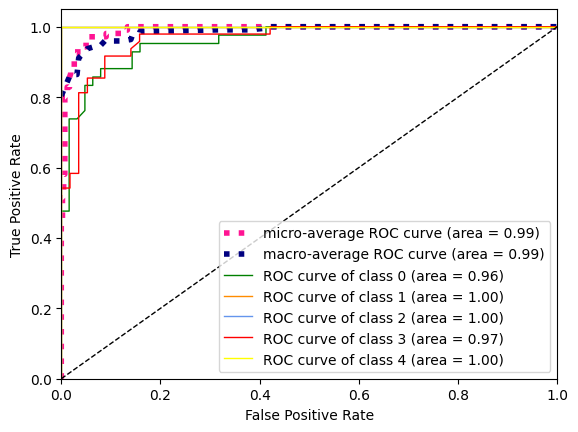

In [419]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Decision Tree

In [420]:
skf = StratifiedKFold(n_splits=3)

In [421]:
i = 1
for train_index, test_index in skf.split(X_resampled, y_resampled):

    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    new = DecisionTreeClassifier(max_depth=8)
    new.fit(X_train, y_train)


    y_pred = new.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"DecisionTree for split {i}")
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Accuracy: {}'.format(accuracy))
    print('Confusion Matrix: \n {}'.format(conf_matrix))
    print('\n')
    i+=1

DecisionTree for split 1
Accuracy: 0.8991596638655462
Confusion Matrix: 
 [[126   0   0  14   0]
 [  8  13   0   3   0]
 [  0   0  10   0   0]
 [  4   0   0 156   0]
 [  7   0   0   0  16]]


DecisionTree for split 2
Accuracy: 0.8851540616246498
Confusion Matrix: 
 [[128   0   0  12   0]
 [  5  18   0   0   0]
 [  0   0  10   0   0]
 [ 15   0   0 145   0]
 [  9   0   0   0  15]]


DecisionTree for split 3
Accuracy: 0.8735955056179775
Confusion Matrix: 
 [[122   2   0  15   1]
 [  0  18   0   5   0]
 [  0   0  10   0   0]
 [  5   7   0 144   4]
 [  6   0   0   0  17]]




In [422]:
import seaborn as sns

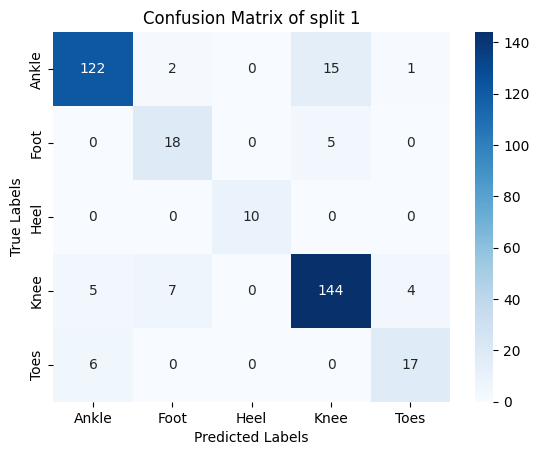

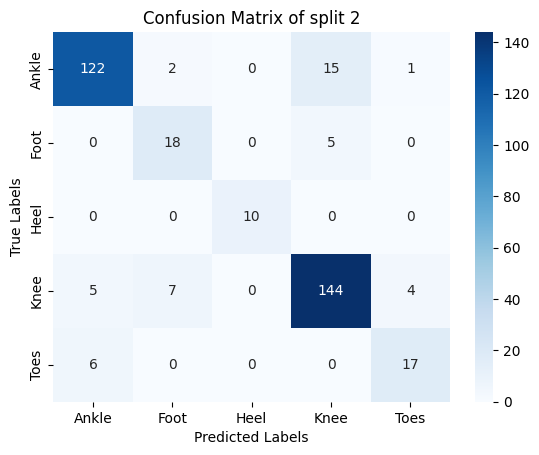

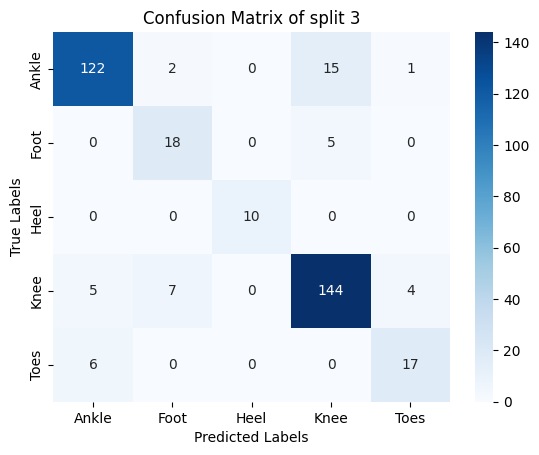

In [423]:
i =1
for train_index, test_index in skf.split(X_resampled, y_resampled):
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ankle', 'Foot', 'Heel', 'Knee', 'Toes'], yticklabels=['Ankle', 'Foot', 'Heel', 'Knee', 'Toes'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix of split {i}')
    plt.show()
    i += 1

In [424]:
i = 1
for train_index, test_index in skf.split(X_resampled, y_resampled):
    print(f"Macro Values for split {i} ")
    arr=precision_recall_fscore_support(y_test, y_pred, average='macro')
    print("Precision : " , arr[0])
    print("Recall : ", arr[1])
    print("F Score : ", arr[2])

    print(f"Micro Values for split {i}")
    arr=precision_recall_fscore_support(y_test, y_pred, average='micro')
    print("Precision", arr[0])
    print("Recall", arr[1])
    print("F Score", arr[2])
    print('\n')
    i += 1

Macro Values for split 1 
Precision :  0.8469471905928903
Recall :  0.8586335403726707
F Score :  0.8516434676434678
Micro Values for split 1
Precision 0.8735955056179775
Recall 0.8735955056179775
F Score 0.8735955056179776


Macro Values for split 2 
Precision :  0.8469471905928903
Recall :  0.8586335403726707
F Score :  0.8516434676434678
Micro Values for split 2
Precision 0.8735955056179775
Recall 0.8735955056179775
F Score 0.8735955056179776


Macro Values for split 3 
Precision :  0.8469471905928903
Recall :  0.8586335403726707
F Score :  0.8516434676434678
Micro Values for split 3
Precision 0.8735955056179775
Recall 0.8735955056179775
F Score 0.8735955056179776




In [425]:
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

<ipython-input-426-5bb78f354800>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


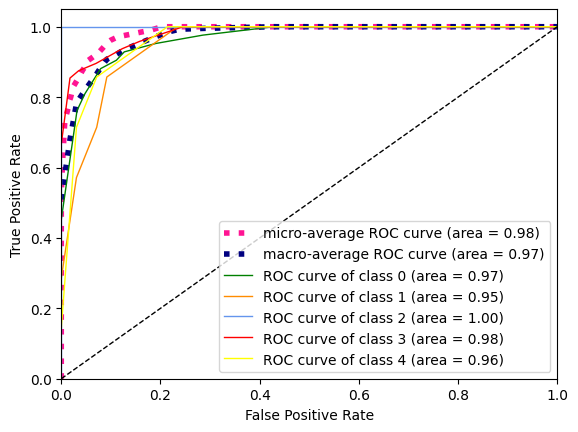

<ipython-input-426-5bb78f354800>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


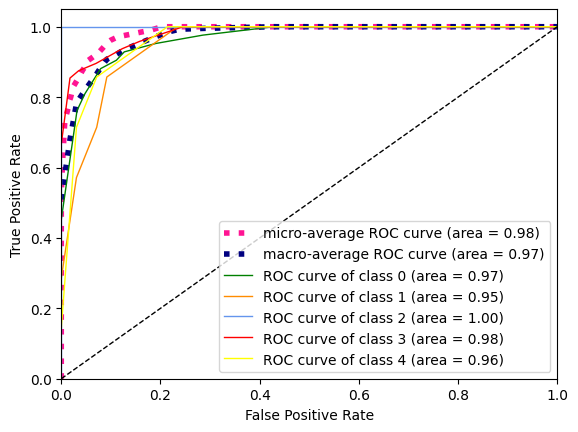

<ipython-input-426-5bb78f354800>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


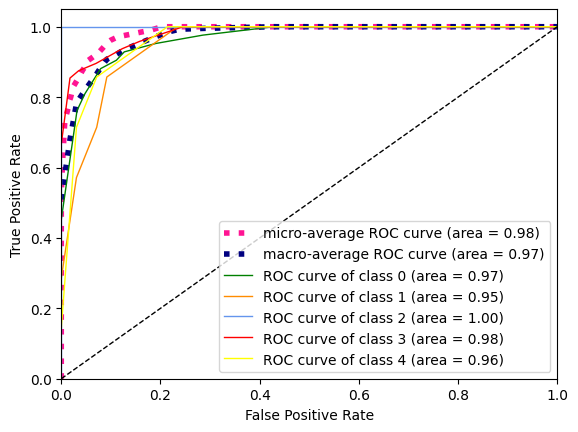

In [426]:
for train_index, test_index in skf.split(X_resampled, y_resampled):
    n_classes = 5


    y_score = new.predict_proba(X)
    #print(y_score)

    y_test = label_binarize(y,classes=['Ankle','Foot','Heel','Knee','Toes'])
    # Compute ROC curve and ROC area for each class


    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    lw=1
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['green', 'darkorange', 'cornflowerblue','red','yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

Multi-Level Perceptron Classifier

In [427]:
from sklearn.neural_network import MLPClassifier

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=21,shuffle=True)
clf = MLPClassifier(max_iter=1000, random_state=1,learning_rate_init=0.01,).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [429]:
# from sklearn.metrics import plot_confusion_matrix

In [430]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))

Accuracy: 0.9906542056074766
Confusion Matrix: 
 [[ 78   0   0   2   0]
 [  0  11   0   0   0]
 [  0   0   5   0   0]
 [  0   0   0 105   0]
 [  0   0   0   0  13]]


In [431]:
print("Macro Values:")
arr=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision", arr[0])
print("Recall", arr[1])
print("F Score", arr[2],"\n")



print("Micro Values:")
arr=precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Precision", arr[0])
print("Recall", arr[1])
print("F Score", arr[2])

Macro Values:
Precision 0.9962616822429906
Recall 0.9949999999999999
F Score 0.9955815619775497 

Micro Values:
Precision 0.9906542056074766
Recall 0.9906542056074766
F Score 0.9906542056074766


In [432]:
n_classes = 3


y_score = clf.predict_proba(X)
# print(y_score)

y_test = label_binarize(y,classes=['Ankle','Foot','Heel','Knee','Toes'])
# Compute ROC curve and ROC area for each class

In [433]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [434]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-434-223289868860>:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


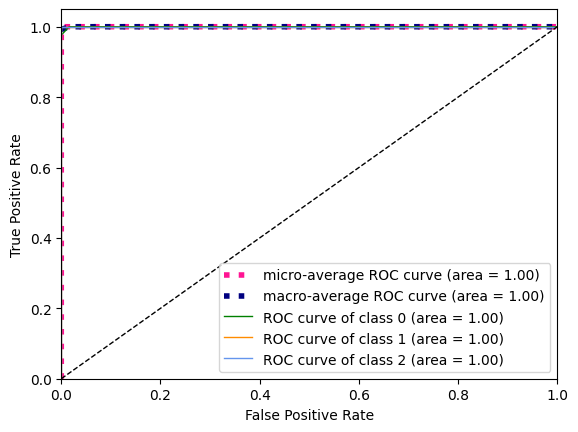

In [435]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


To calculate time required for recovery.


In [49]:
injury_df = pd.read_csv('/content/drive/MyDrive/Data_IML/IML_Final_Project/InjuryRecord .csv')

In [50]:
injury_df.head()


,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [52]:
injury_df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

In [55]:
Playlist_df2 = PlayList_df1
Playlist_df2.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
81,26624,26624-2,26624-2-1,Quarterback,11,2,Indoors,Synthetic,85,Mostly Cloudy,Pass,1,QB,QB
157,26624,26624-3,26624-3-1,Quarterback,18,3,Outdoor,Synthetic,84,Sunny,Rush,1,QB,QB
221,26624,26624-4,26624-4-1,Quarterback,25,4,Outdoor,Synthetic,61,Sunny,Pass,1,QB,QB
291,26624,26624-5,26624-5-1,Quarterback,29,5,Outdoor,Natural,76,Clear,Pass,1,QB,QB


In [57]:
game_injury_df = injury_df.set_index('GameID').join(Playlist_df2.set_index('GameID'), how = 'outer',lsuffix='_left', rsuffix='_right')

In [62]:
game_injury_df.head()
game_injury_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5713 entries, 26624-1 to 47888-9
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PlayerKey_left   105 non-null    float64
 1   PlayKey_left     77 non-null     object 
 2   BodyPart         105 non-null    object 
 3   Surface          105 non-null    object 
 4   DM_M1            105 non-null    float64
 5   DM_M7            105 non-null    float64
 6   DM_M28           105 non-null    float64
 7   DM_M42           105 non-null    float64
 8   PlayerKey_right  5713 non-null   int64  
 9   PlayKey_right    5713 non-null   object 
 10  RosterPosition   5713 non-null   object 
 11  PlayerDay        5713 non-null   int64  
 12  PlayerGame       5713 non-null   int64  
 13  StadiumType      5363 non-null   object 
 14  FieldType        5713 non-null   object 
 15  Temperature      5713 non-null   int64  
 16  Weather          5299 non-null   object 
 17  PlayType  

In [61]:
null_values_DM_M1 = game_injury_df['DM_M1'].isnull().sum()
null_values_DM_M1

5608

In [63]:
game_injury_df['DM_M1'] = game_injury_df['DM_M1'].fillna(0).astype(int)
game_injury_df['DM_M7'] = game_injury_df['DM_M7'].fillna(0).astype(int)
game_injury_df['DM_M28'] = game_injury_df['DM_M28'].fillna(0).astype(int)
game_injury_df['DM_M42'] = game_injury_df['DM_M42'].fillna(0).astype(int)

In [64]:
game_injury_df['Total_Injury'] = game_injury_df['DM_M1'] + game_injury_df['DM_M7'] + game_injury_df['DM_M28'] + game_injury_df['DM_M42']

In [65]:
game_injury_df.columns

Index(['PlayerKey_left', 'PlayKey_left', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'PlayerKey_right', 'PlayKey_right',
       'RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType',
       'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position',
       'PositionGroup', 'Total_Injury'],
      dtype='object')

In [66]:
game_injury_df.drop(columns=['PlayerKey_left','BodyPart', 'PlayKey_right','PlayKey_left', 'PlayerKey_right', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42','Surface','PlayerGamePlay'],axis=1,inplace=True)

In [68]:
game_injury_df.head()

,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,Position,PositionGroup,Total_Injury
GameID,,,,,,,,,,,
26624-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,QB,QB,0
26624-10,Quarterback,74,10,Outdoor,Natural,66,Sunny,Rush,QB,QB,0
26624-11,Quarterback,81,11,Outdoor,Synthetic,47,Partly Cloudy,Pass,QB,QB,0
26624-12,Quarterback,88,12,Outdoors,Synthetic,48,Mostly cloudy,Rush,QB,QB,0
26624-13,Quarterback,96,13,Outdoor,Natural,55,Clear,Rush,QB,QB,0


In [69]:
game_injury_df['StadiumType'].unique()

array(['Outdoor', 'Outdoors', 'Open', 'Indoors', 'Oudoor', 'Closed Dome',
       'Domed, closed', nan, 'Dome', 'Indoor', 'Domed',
       'Retractable Roof', 'Retr. Roof-Closed', 'Outdoor Retr Roof-Open',
       'Ourdoor', 'Retr. Roof - Closed', 'Indoor, Roof Closed', 'Bowl',
       'Retr. Roof-Open', 'Outddors', 'Dome, closed', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Heinz Field', 'Cloudy',
       'Retr. Roof - Open', 'Retr. Roof Closed', 'Outdor', 'Outside'],
      dtype=object)

In [71]:
print(game_injury_df['Total_Injury'].value_counts())

Total_Injury
0    5608
2      39
4      29
1      29
3       8
Name: count, dtype: int64


In [74]:
condition1 = game_injury_df['Total_Injury']!=0
features_df1=game_injury_df[condition1]
features_df1 = pd.get_dummies(features_df1)
print(features_df1['Total_Injury'].value_counts())

Total_Injury
2    39
4    29
1    29
3     8
Name: count, dtype: int64


In [75]:
features_df1

,PlayerDay,PlayerGame,Temperature,Total_Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Running Back,RosterPosition_Safety,...,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_RB,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,
31070-3,15,3,89,4,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
31933-20,394,20,84,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
33337-2,8,2,83,4,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
33337-8,365,8,81,3,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
33474-19,393,19,79,3,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,74,10,68,2,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
47307-10,74,10,68,2,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
47334-8,58,8,74,2,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [77]:
pd.DataFrame(features_df1).to_csv("/content/drive/MyDrive/Data_IML/IML_Final_Project/data.csv")

In [78]:
new_df = pd.read_csv('/content/drive/MyDrive/Data_IML/IML_Final_Project/data.csv')

In [79]:
new_df.head()

,GameID,PlayerDay,PlayerGame,Temperature,Total_Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Running Back,...,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_RB,PositionGroup_TE,PositionGroup_WR
0,31070-3,15,3,89,4,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,31933-20,394,20,84,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,33337-2,8,2,83,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,33337-8,365,8,81,3,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,33474-19,393,19,79,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [83]:
new_df.columns

Index(['GameID', 'PlayerDay', 'PlayerGame', 'Temperature', 'Total_Injury',
       'RosterPosition_Cornerback', 'RosterPosition_Defensive Lineman',
       'RosterPosition_Linebacker', 'RosterPosition_Offensive Lineman',
       'RosterPosition_Running Back', 'RosterPosition_Safety',
       'RosterPosition_Tight End', 'RosterPosition_Wide Receiver',
       'StadiumType_Closed Dome', 'StadiumType_Dome',
       'StadiumType_Domed, closed', 'StadiumType_Heinz Field',
       'StadiumType_Indoor', 'StadiumType_Indoor, Open Roof',
       'StadiumType_Indoor, Roof Closed', 'StadiumType_Indoors',
       'StadiumType_Open', 'StadiumType_Oudoor', 'StadiumType_Outddors',
       'StadiumType_Outdoor', 'StadiumType_Outdoors',
       'StadiumType_Retr. Roof - Closed', 'StadiumType_Retr. Roof - Open',
       'StadiumType_Retr. Roof-Closed', 'StadiumType_Retractable Roof',
       'FieldType_Natural', 'FieldType_Synthetic', 'Weather_Clear',
       'Weather_Clear Skies', 'Weather_Clear and Sunny',
       '

In [87]:
desired_columns = ['GameID', 'PlayerDay', 'PlayerGame', 'Temperature', 'Total_Injury',
                   'RosterPosition_Cornerback', 'RosterPosition_Defensive Lineman',
                   'RosterPosition_Linebacker', 'RosterPosition_Offensive Lineman',
                   'RosterPosition_Running Back', 'RosterPosition_Safety',
                   'RosterPosition_Tight End', 'RosterPosition_Wide Receiver',
                   'StadiumType_Dome', 'StadiumType_Indoor', 'StadiumType_Outdoor',
                   'StadiumType_Retractable Roof', 'FieldType_Natural', 'FieldType_Synthetic',
                   'Weather_Clear', 'Weather_Cloudy', 'Weather_Indoor', 'Weather_Rain',
                   'PlayType_Extra Point', 'PlayType_Kickoff', 'PlayType_Kickoff Not Returned',
                   'PlayType_Kickoff Returned', 'PlayType_Pass', 'PlayType_Punt',
                   'PlayType_Punt Returned', 'PlayType_Rush', 'Position_C', 'Position_CB',
                   'Position_DB', 'Position_DE', 'Position_DT', 'Position_FS', 'Position_ILB',
                   'Position_LB', 'Position_MLB', 'Position_OLB', 'Position_RB',
                   'Position_SS', 'Position_T', 'Position_TE', 'Position_WR',
                   'PositionGroup_DB', 'PositionGroup_DL', 'PositionGroup_LB',
                   'PositionGroup_OL', 'PositionGroup_RB', 'PositionGroup_TE',
                   'PositionGroup_WR']

new_df = new_df[desired_columns]

In [91]:
# Replace missing temperature values with 55
new_df.loc[(new_df.Temperature == -999),'Temperature']= 55

# Convert negative PlayerDay values to positive
new_df["PlayerDay"] = new_df["PlayerDay"].abs()

# Set GameID as the index of the DataFrame
features_df1 = new_df.set_index('GameID')

features_df1

<ipython-input-91-da05e4c58a39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["PlayerDay"] = new_df["PlayerDay"].abs()


,PlayerDay,PlayerGame,Temperature,Total_Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Running Back,RosterPosition_Safety,...,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_RB,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,
31070-3,15,3,89,4,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
31933-20,394,20,84,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
33337-2,8,2,83,4,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
33337-8,365,8,81,3,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
33474-19,393,19,79,3,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,74,10,68,2,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
47307-10,74,10,68,2,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
47334-8,58,8,74,2,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [92]:
# Assign target variable y and features X
y = features_df1['Total_Injury']
X = features_df1.drop(columns=['Total_Injury'])

# Print the shape of features X
print(X.shape)

# Oversampling using RandomOverSampler
res = RandomOverSampler(random_state=0, sampling_strategy={1: 2900, 2: 3900, 3: 800, 4: 2900})
X_resampled, y_resampled = res.fit_resample(X, y)

# Convert resampled target variable y_resampled to a DataFrame
dt_yresam = pd.DataFrame(y_resampled)
dt_yresam.columns = ['T']

# Print the value counts of the resampled target variable
print(dt_yresam['T'].value_counts())

# Shuffle the rows of the resampled target variable
dt_yresam.sample(frac=1)

# Print the shape of the resampled features
print(X_resampled.shape)

(105, 51)
T
2    3900
4    2900
1    2900
3     800
Name: count, dtype: int64
(10500, 51)


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (2900) in class 1 will be larger than the number of samples in the majority class (class #2 -> 39)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3900) in class 2 will be larger than the number of samples in the majority class (class #2 -> 39)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (800) in class 3 will be larger than the number of samples in the majority class (class #2 -> 39)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (2900) in class 4 will be larger than the number of samples in the majority class (class #2 -> 39)
  warnings.warn(


In [95]:
import random
from sklearn.linear_model import LinearRegression
import math

In [98]:
lis1=[]
for i in y_resampled:
  if(i==0):
    lis1.append(0)
  elif(i==1):
    lis1.append(random.randint(1,6))
  elif(i==2):
    lis1.append(random.randint(7,14))
  elif(i==3):
    lis1.append(random.randint(15,28))
  elif(i==4):
    lis1.append(random.randint(29,42))

lis1=np.array(lis1)
print(lis1)


[41  6 35 ... 35 42 41]


In [101]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, lis1, test_size=0.2, random_state=42, shuffle=True)

# Training the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Making predictions on the test set
y_pred = reg.predict(X_test)

# Printing the length of y_pred and the predictions
print(len(y_pred))
for i in range(len(y_pred)):
    y_pred[i]=int(round(y_pred[i]))
y_pred


2100


array([10., 15., 15., ..., 20., 19., 10.])

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

129.3790476190476

In [103]:
from sklearn.manifold import TSNE

In [104]:
print(X_test.shape)

(2100, 51)


In [105]:
print(y_test.shape)

(2100,)


In [106]:
X_embedded = TSNE(n_components=1).fit_transform(X_test)

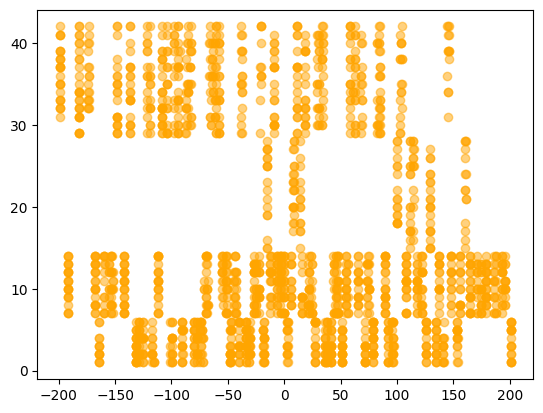

In [107]:
plt.scatter(X_embedded, y_test, color = 'orange', alpha=0.5)

In [108]:
X_embedded = pd.DataFrame(X_embedded,columns = ['X'])
y_test_df = pd.DataFrame(y_test,columns=['Y'])
y_test_df

,Y
0,11
1,38
2,40
3,26
4,19
...,...
2095,1
2096,37
2097,30
2098,3


In [109]:
df= pd.concat([X_embedded,y_test_df],axis=1)
df

,X,Y
0,5.861374,11
1,58.779701,38
2,-9.211631,40
3,-15.334432,26
4,111.240906,19
...,...,...
2095,-115.779663,1
2096,-83.573853,37
2097,-137.073257,30
2098,79.089027,3


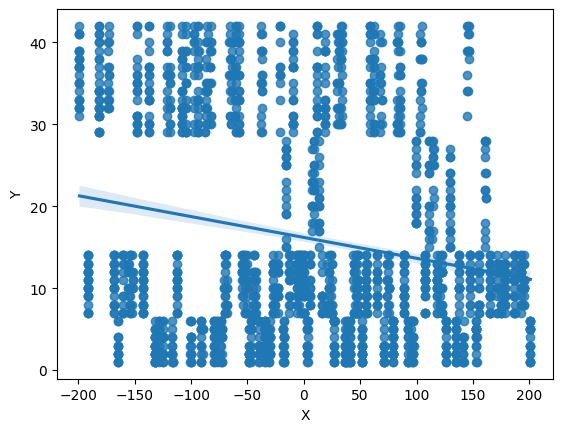

In [111]:
sns.regplot(x="X", y="Y", data=df);

In [113]:
from sklearn.decomposition import PCA

# Fit PCA to the regression coefficients
red_coef = PCA(n_components=1).fit_transform([reg.coef_])
red_coef

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


array([[0.]])

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
regr = RandomForestRegressor(max_depth=20, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
for i in range(len(y_pred)):
  y_pred[i]=int(round(y_pred[i]))
print(y_pred)
print(y_test)

[10. 35. 35. ... 35.  3.  3.]
[11 38 40 ... 30  3  6]


In [126]:
mean_squared_error(y_test, y_pred)

8.77095238095238

In [127]:
regr.criterion

'squared_error'

SVR

In [128]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [129]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
for i in range(len(y_pred)):
  y_pred[i]=int(round(y_pred[i]))
print(y_pred)
print(y_test)

[11. 25. 20. ... 31.  4.  5.]
[11 38 40 ... 30  3  6]


In [130]:
mean_squared_error(y_test, y_pred)

40.235238095238095